# 1 数据探索

本案例的数据来源于Gazi University于2013年在学生中做的课程教学问卷，可以参考其官网，在这次调查中，每位学生需要回答28个与课程相关的选择题，每题的5个选项{1,2,3,4,5}代表答题人对该题的赞成程度。除此之外，还有5个特征为课程及其任课老师的信息，包括教师工号、课程ID、上课次数、出勤率和课程难度。

下面是33个特征的含义介绍：

In [1]:
# 载入一些基本的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取介绍特征信息的文本文件
df_intro=pd.read_table("feature_introduction.txt",names=["intro"],sep="\n")

# 逐行输出方便观察
for i in range(len(df_intro)):
    print(df_intro["intro"][i])

instr: Instructor's identifier; values taken from {1,2,3} 
class: Course code (descriptor); values taken from {1-13} 
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...} 
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4} 
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5} 
Q1: The semester course content, teaching method and evaluation system were provided at the start. 
Q2: The course aims and objectives were clearly stated at the beginning of the period. 
Q3: The course was worth the amount of credit assigned to it. 
Q4: The course was taught according to the syllabus announced on the first day of class. 
Q5: The class discussions, homework assignments, applications and studies were satisfactory. 
Q6: The textbook and other courses resources were sufficient and up to date. 
Q7: The course allowed field work, applications, laboratory, discussion and other studies. 
Q8: T

本案例的目的是找到影响出勤率和课程受欢迎程度的关键特征，所以我们需要关注attendance（出勤率）和Q9（课程喜欢程度），并分别建立以之为目标变量的特征选择。

### 读取数据：

In [3]:
# 为显示全部的列，添加如下的命令。
pd.set_option('display.max_columns',None)
data=pd.read_csv("turkiye-student-evaluation_generic.csv")
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


观察数据集的基本信息：

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

### 观察发现：
    1）数据集维度是(5820, 33)；
    2）所有特征都很完整，不需要做缺失值处理；
    3）所有数据都是int64类型，不需要做数值化转换；
    4）所有特征都是离散型变量，不适合某些针对连续数据的特征选择方法（比如Pearson相关系数）。

In [6]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


观察各特征的常用统计量发现，数据间没有量级差异，不需要做标准化处理。

观察特征间的相关性：

In [7]:
# 为显示直观，我们将5个代表课程信息的特征命名为I1-I5
df_cor=data.copy()
df_cor.columns=pd.Index(["I1","I2","I3","I4","I5"]+list(df_cor.columns[5:34]))
df_cor.head()

,I1,I2,I3,I4,I5,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


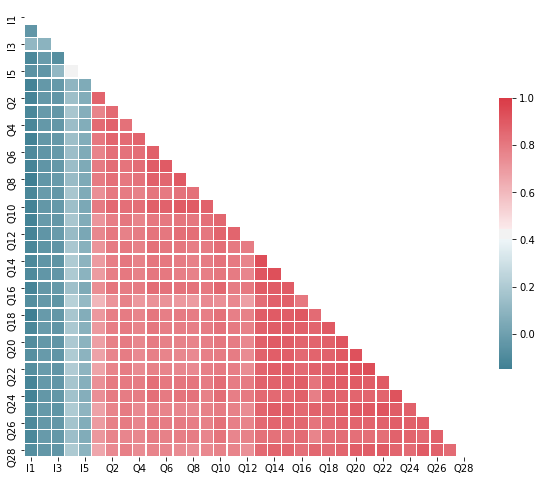

In [8]:
# 计算相关矩阵
corr = df_cor.corr()

# 设置图形类型为下三角矩阵
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 做相关矩阵图
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

特征I4也就是attendance与I5（difficulty）相关性较高，28个问题之间都存在较强的相关性，关于课程基本信息的特征I1-I3与其它特征没有明显的相关性。

# 2 基于出勤率的特征选择 

### 特征选择一般有两个目的：
    1）选择最优特征以提升模型性能；
    2）理解数据，比如特征之间的关系、数据结构特点等；
    对于第一种情况，适合采用封装式、嵌入式的方法，因为过滤式的特征选择对有同样作用的特征没有筛选功能，比如多重共线性等问题，容易造成冗余；对于第二种情况，则适合采用过滤式方法或者稳定的嵌入式方法，过滤式方法简单有效，能阐释特征之间的关系，一般的封装式和嵌入式方法都是以模型为主的，容易出现重要特征得分低的情况（存在关联特征），因此稳定性不强，稳定性较强的嵌入式方法有：随机lasso、岭回归、随机logistic等。

本案例只要求找到影响出勤率和课程受欢迎程度的关键特征，而不需要进一步建立模型预测，所以我们可以使用简单的过滤式特征选择：基于出勤率的特征选择采用卡方检验方法，基于课程受欢迎程度的特征选择采用互信息MIC为指标。

特征选择前的准备工作：

In [9]:
# 定义选取的关键特征个数
N=6

# 准备好原始特征
df_feature=data.copy()
del df_feature["attendance"]

# 准备好标签
label=data["attendance"]


In [11]:
"""
函数find_name(new_feature, df_feature)用来输出关键特征的名称；
输入：原始特征、选择的关键特征；
输出：关键特征的名称
"""
def find_name(new_feature, df_feature):
    
    # 定义列表存储关键特征名称
    feature_name=[]
    col=df_feature.columns
    
    # 寻找关键特征的名称信息
    for i in range(N):
        for j in range(df_feature.shape[1]):
            
            # 判别标准为new_feature中的特征向量与df_feature中的特征向量一致
            if np.mean(abs(new_feature[i]-df_feature[col[j]]))==0:
                feature_name.append(col[j])
                print (i+1,col[j]) 
                break
    return feature_name

### 过滤法

下面利用卡方检验方法选择影响attendance的前N个关键特征：

In [12]:
# 用卡方检验选择前N个关键特征
from sklearn.feature_selection import SelectKBest,chi2 
new_feature=SelectKBest(chi2,k=N).fit_transform(df_feature,label).T
FS_list=find_name(new_feature, df_feature)

1 difficulty
2 Q17
3 Q21
4 Q22
5 Q25
6 Q28


通过卡方检验方法，我们选出了前6个影响attendance的关键特征，分别是difficulty， Q17， Q21， Q22，Q25，Q28，下面我们进一步观察这些关键特征对出勤率分布的影响如何，以期找到他们之间的关系。

In [14]:
FS_list

['difficulty', 'Q17', 'Q21', 'Q22', 'Q25', 'Q28']

In [18]:
def draw(x, data, ax):
    sns.boxplot(x, y = 'attendance', data = data, ax=ax)

In [22]:
axes[0,0]

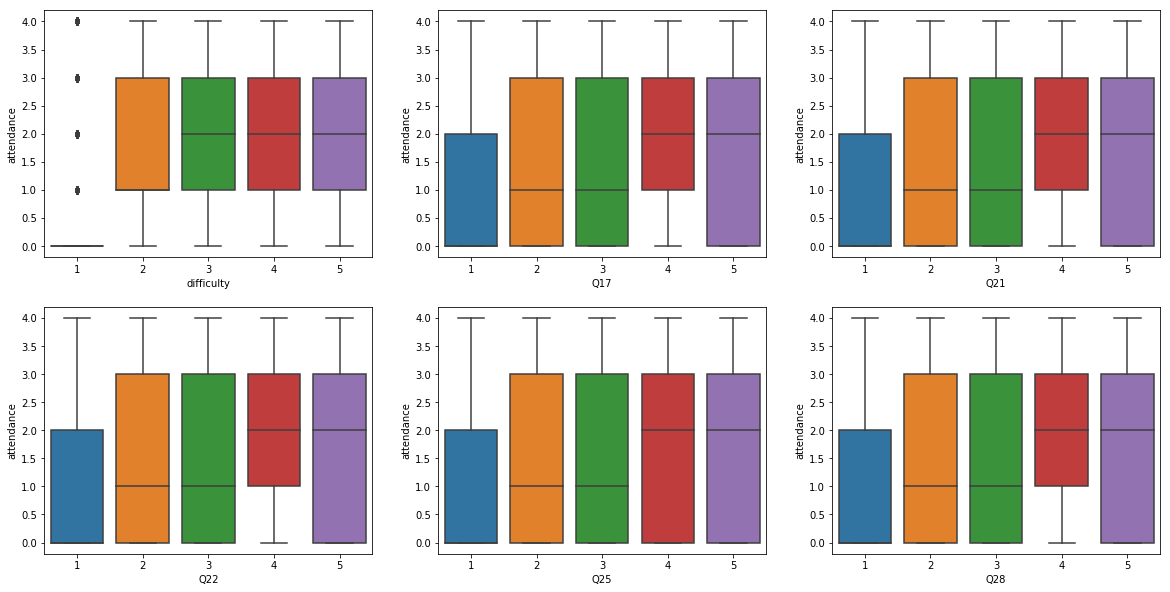

In [27]:
# 画出不同特征值下出勤率分布情况的箱型图
f, axes = plt.subplots(2, 3, figsize=(20,10))
for i,item in enumerate(FS_list):
    sns.boxplot(x=item,y='attendance',data=data,ax=axes[i//3,i%3])
plt.show()

### 观察上述箱型图可以发现:
1. 当课程难度为3-5时，出勤率分布并没有明显的区别；当课程难度为2时，出勤率的中位数降为1；当课程难度为1时，绝大部分出勤率都为0，这说明当课程难度很小时，学生们几乎不出勤；同时课程难度与出勤率在一定区间内是存在正相关关系的。
2. 我们容易注意到，Q17， Q21， Q22，Q25，Q28这五个特征对出勤率的影响方式是相似的，因为它们的箱型图分布几乎完全一样。观察特征的含义：
    
        -Q17：老师按时上课
        -Q21：老师以积极的态度授课
        -Q22：老师拥有开放的心态，并尊重学生的观点
        -Q25：老师会在课上课下回答关于课程的问题
        -Q28：老师会客观有礼地对待所有学生

这几个特征都是在描述老师的授课方式及礼仪态度问题，这说明这几个因素是学生们比较关注的。进一步观察单个箱型图，当特征程度为1时，出勤率的中位数是0；当特征程度为2-3时，出勤率的中位数是1；当特征程度为4-5时，出勤率的中位数是2；以上分析说明这几个特征与出勤率也存在一定程度上的正相关关系。

总体来说，选择的6个特征与出勤率都存在一定程度上的正相关关系，以课程难度难度为例，进一步观察这种关系的强度如何。需要注意，特征都是离散变量，下面做简单的回归是用均值代替x_estimator的。

D:\Apps\PythonicApps\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


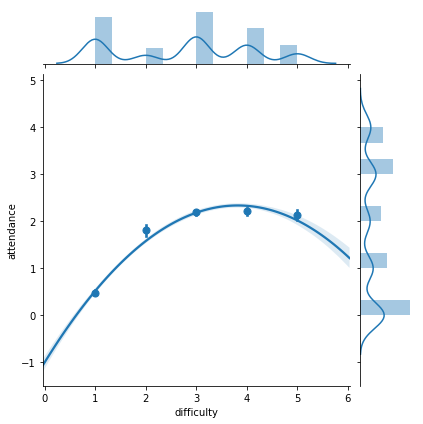

In [28]:
# 进一步观察正相关强度如何
sns.jointplot(x='difficulty',y='attendance',data=data,kind='reg',x_estimator= np.mean,order=2)
plt.show()


课程难度与出勤率确实存在正相关关系，但这种关系在课程难度较低时更加明显，所以综合全局来看，抛物线更符合这种关系。

如果还想观察具体的分布情况，可以用如下程序实现：

In [29]:
# 输出课程难度为1时的出勤率统计
diff_1=data["attendance"][data["difficulty"]==1]
index=diff_1.index
count=np.zeros(5)
for i in range(len(diff_1)):
    for j in range(5):
        if diff_1[index[i]]==j:
            count[j] += 1
print(count) 

[1317.   80.   54.   92.   77.]


# 3 基于课程受欢迎程度的特征选择

利用互信息MIC作指标来选择影响Q9（课程喜欢程度）的关键特征，首先，做一些准备工作：

In [30]:
# 定义选取的关键特征个数
N=6

# 准备好原始特征
df_feature=data.copy()
del df_feature["Q9"]

# 准备好标签
label=data["Q9"]

### 下面利用互信息MIC来选择影响Q9（课程喜欢程度）的前N个关键特征：

In [33]:
# 引入MINE模块
from minepy import MINE

"""
函数FS_MIC(target, feature, N)用来根据MIC系数选择特征
输入：目标变量、特征、需要选出的特征个数
输出：根据MIC系数求出来的前N个特征
"""
def FS_MIC(target, feature, N):
    
    # 记录各特征与target的互信息系数
    corr_list=[]
    col=feature.columns
    for i in range(len(col)):
        m=MINE()
        m.compute_score(target, feature[col[i]])
        corr_list.append(m.mic())
        
    # 字典存储    
    dict_order=dict(zip(col, corr_list))
    
    # 按MIC系数大小排序
    new_feature=sorted(dict_order.items(),key=lambda item:item[1], reverse=True)
    
    # 输出前N个特征
    for i in range(N):
        print(new_feature[i])
    
    # 画出前N个特征与标签的MIC系数柱状图
    feature_top, score=zip(*new_feature)
    df=pd.DataFrame(np.array(score[:N]),columns=["MIC"],index=feature_top[:N])
    fig=plt.figure(figsize=(6,4))
    ax1=fig.add_subplot(1,1,1)
    df.plot(kind="bar",ax=ax1)
    plt.ylim([min(score[:N])*0.75,max(score[:N])*1.25])
    plt.show()
    
    return list(feature_top[:N])

('Q10', 0.5770588885602165)
('Q8', 0.5254806134484354)
('Q11', 0.5175597736064881)
('Q7', 0.5098793934532719)
('Q5', 0.5015207801490598)
('Q12', 0.4975998535462428)


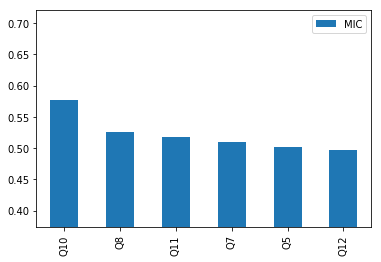

In [34]:
FS_list=FS_MIC(label, df_feature, N)

通过互信息MIC方法，我们选出了6个影响Q9的关键特征，分别是Q10， Q8， Q11， Q7，Q5，Q12，下面我们进一步观察这些关键特征对课程受欢迎程度分布的影响如何，以期找到他们之间的关系。



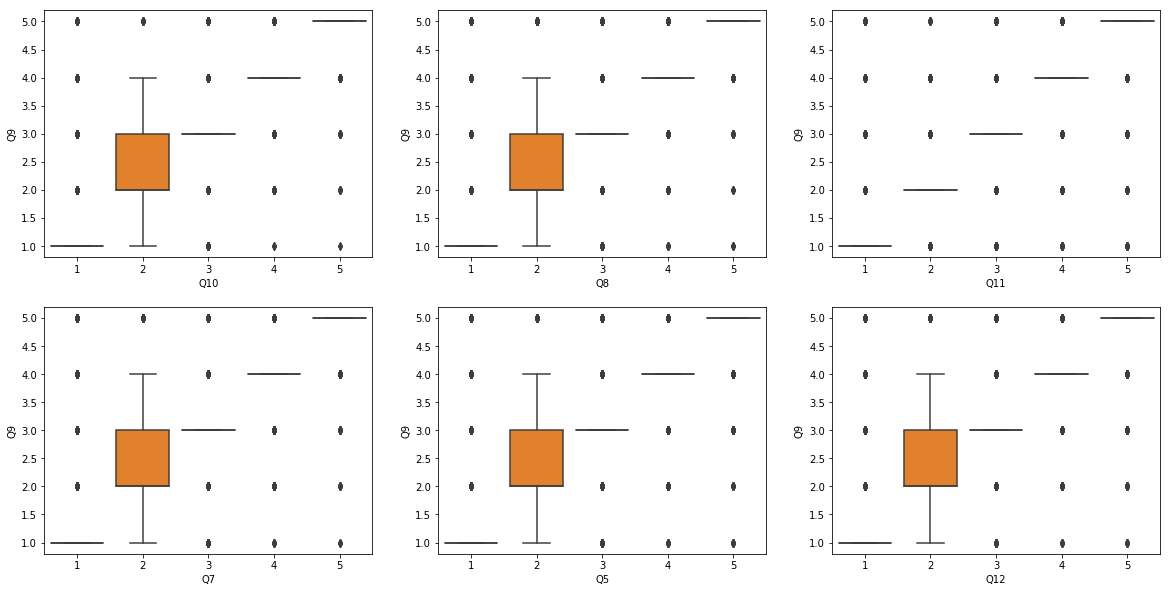

In [35]:
# 画出不同特征值下课程受欢迎程度分布情况的箱型图
f, axes = plt.subplots(2, 3, figsize=(20,10))
for i,item in enumerate(FS_list):
    sns.boxplot(x=item,y='Q9',data=data,ax=axes[i//3,i%3])
plt.show()

### 首先观察特征的含义：
    Q10：课程达到了我初始的期望
    Q8：测验、作业及考试对学习有作用
    Q11：课程对我的职业发展有利
    Q7：课程组织形式丰富
    Q5：对课堂讨论、作业布置很满意
    Q12：课程教会我以一个新的角度看待世界

这几个特征都是在描述课程的收获及感受问题，这说明这几个因素是学生们比较关注的。进一步观察单个箱型图，发现这几个特征与课程受欢迎程度都存在一定程度上的正相关关系，以Q10为例，进一步观察这种关系的强度如何。需要注意，特征都是离散变量，下面做简单的回归是用均值代替x_estimator的。

D:\Apps\PythonicApps\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


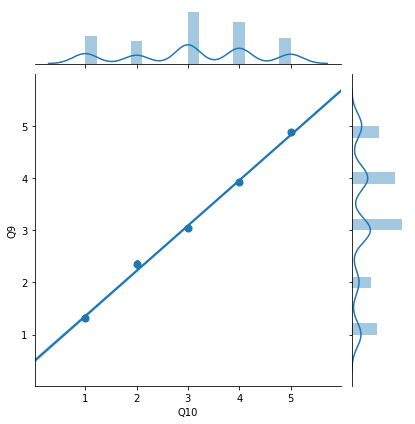

In [36]:
# 进一步观察正相关强度如何
sns.jointplot(x='Q10',y='Q9',data=data,kind='reg',x_estimator= np.mean)
plt.show()

特征Q10和Q9存在明显的线性正相关关系，说明在一般情况下，当课程内容达到了学生期望时，学生就会喜欢这门课。